# Combinatorial Complexes

## Setup

In [1]:
from toponetx import CombinatorialComplex as cc

## Combinatorial Complex

A *combinatorial complex* combines features of both hypergraphs and of cell complexes $[1]$. A hypergraph is, as defined by $[2]$, a generalisation of a graph in which a single edge is not limited to joining just two vertices like in an ordinary graph, but can actually join multiple vertices together. 

TODO: Set 

TODO: Hierarchy

### Defintion of Combinatorial Complex

$[1]$ Let S be a non-empty finite set and $\mathcal{P}(S)$ its power set. A combinatorial complex (CC) is a tuple $(X, \imath)$ formed by a set $X \subset \mathcal{P}(S)$ \ ${\emptyset}$ together with a rank function $\imath : X \rightarrow \mathbb{Z}^+$
that 

&emsp; (i) $\imath$({$x$}) $= 0$ for all $x \in S$, and 

&emsp; (ii) for all $x, y \in X$ , if $x \subsetneq y$ then $\imath (x) < \imath (y)$.

### Example of a Combinatorial Complex

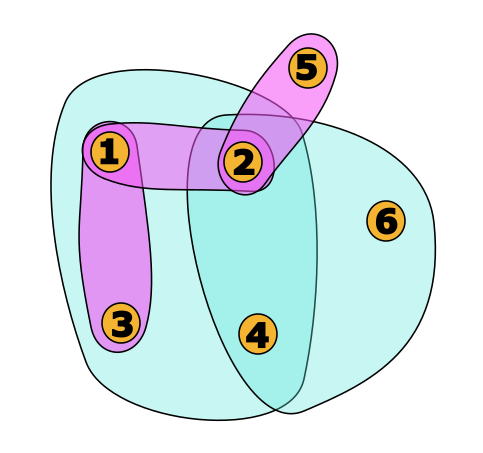

This is an example of a combinatorial complex (CC), this example has six cells of rank 0, three cells of rank 1 and two cells of rank 2. As we can see this is different to a cell comples (CX) as cells of rank 2 can contain cells of rank 0 without needing cells of rank 0 also. 

To express this example as code we may use the `add_cell` function. Examples of this can be seen below.

In [2]:
example = cc()

example.add_cell([1, 2], rank=1)
print(example)

example.add_cell([1, 3], rank=1)
print(example)

example.add_cell([1, 2, 4, 3], rank=2)
print(example)

example.add_cell([2, 5], rank=1)
print(example)

example.add_cell([2, 6, 4], rank=2)
print(example)

Combinatorial Complex with 2 nodes and cells with ranks [0, 1] and sizes [2, 1] 
Combinatorial Complex with 3 nodes and cells with ranks [0, 1] and sizes [3, 2] 
Combinatorial Complex with 4 nodes and cells with ranks [0, 1, 2] and sizes [4, 2, 1] 
Combinatorial Complex with 5 nodes and cells with ranks [0, 1, 2] and sizes [5, 3, 1] 
Combinatorial Complex with 6 nodes and cells with ranks [0, 1, 2] and sizes [6, 3, 2] 


The output of this code clearly demonstrates how the CC builds up. The first line of the output comes from adding the rank 1 cell $[1,2]$. This rank 1 cell is made up of two rank 0 cells - therefor the output says we have cells with ranks $[0,1]$ and these cells have sizes $[2,1]$. Sizes refers to the number of cells with that rank, so after our first line of input we have two cells of rank 0 and one cell of rank 1.

Each futher line of input is adding another cell of varying rank. Finally, the last line of output is telling us that we have cells of rank 0, 1 and 2 and that they respectively have sizes of 6, 3 and 2. This is such that we have six cells of rank 0, three cells of rank 1 and two cells of rank 2, just like our example figure does.

### Helpful Code Output

If you ever need the list of rank-0 cells, rank-1 cells or rank-2 cells the code below is useful for that. This utilises something called an incidence matrix which is explained later in the tutorial. Knowing the order that cells of each rank is listed in is very important when it comes to understanding the output of adjacency and incidence matrices, using this code allows you to access that information at any time.

In [3]:
row, column, B2 = example.incidence_matrix(0, 1, index=True)
row1, column1, B2 = example.incidence_matrix(1, 2, index=True)
print("rank 0:")
print(row)
print("rank 1:")
print(column)
print("rank 2:")
print(column1)

rank 0:
OrderedDict([(frozenset({1}), 0), (frozenset({2}), 1), (frozenset({3}), 2), (frozenset({4}), 3), (frozenset({5}), 4), (frozenset({6}), 5)])
rank 1:
OrderedDict([(frozenset({1, 2}), 0), (frozenset({1, 3}), 1), (frozenset({2, 5}), 2)])
rank 2:
OrderedDict([(frozenset({1, 2, 3, 4}), 0), (frozenset({2, 4, 6}), 1)])


Although at first glance this may appear confusing, once you understand the output format it is quite simple. This output is telling us that:

In the cells of rank-0, the $0^{th}$ cell is {1}, the $1^{st}$ cell is {2}, and so on until reaching the $5^{th}$ cell which is {6}.

In the cells of rank-1, the $0^{th}$ cell is {1,2}, the $1^{st}$ cell is {1,3} and the $2^{nd}$ cell is {2,5}.

In the cells of rank-2, the $0^{th}$ cell is {1,2,3,4} and the $1^{st}$ cell is {2,4,6}.

Comparing this information to the diagram of our example, we see that all the cells of each rank are listed, and now we also know their order. 

## Adjacency

### Adjacency Matrix

An *adjacency matrix*, is a square matrix that compares a class of objects to themselves (hence being square). Entries in an adjacency matrix are zero if they are not adjacent, and non-zero if they are adjacent. 

Being 'adjacent' is defined in this context as related to each other via some higher-ranked class. Thus, when we have $n$ ranks, the number of adjacencies ,$A_n$, is defined by:

$A_n = A_{n-1} + (n-1)$ with $n \geq 2$ where $A_2 = 1$.

In our example there are 3 ranks, this means the number of adjacency matrices that we can make is 3; A01, A02, A12. Any other combination would be impossible as cells can only be adjacent via a cell of a higher rank. 

In [7]:
A01 = example.adjacency_matrix(0, 1).todense()
print(A01)

[[0 1 1 0 0 0]
 [1 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]]


As this is A01 matrix, it is comparing if cells of rank-0 are related to other cells of rank-0 via any cells of rank-1. The matrix is square, due to the fact it is comparing each rank-0 cell to every other rank-0 cell- it is not important which rank-1 cell they are adjacent by. Here we can see that the matrix is symmetric, this is due to the fact that the CC is not directed. 

To remind ourselves, 

*rank-0*: 0: {1}, 1: {2}, 2: {3}, 3: {4}, 4: {5}, 5: {6}

*rank-1*: 0: {1,2}, 1: {1,3}, 2: {2,5}.

Looking at the output, the $0^{th}$ row tells us that the $0^{th}$ rank-0 cell is adjacent to the $1^{st}$ and $2^{nd}$ rank-0 cells. That is, {1} is adjacent to {2} and {3} via some rank-1 cell. By looking at our list of rank-1 cells it is easy to see that {1,2} and {1,3} are the rank-1 cells that {1} is adjacent to {2},{3} via. 

The $2^{nd}$ row tell us that that $2^{nd}$ rank-0 cell is adjacent to the $0^{th}$ rank-0 cell. This is such that {3} is adjacent to {1} via a rank-1 cell. The rest of the entries in that row are 0, which means {3} is only adjacent via a rank-1 cell to {1}, this is evident by looking at the diagram of our example.

In [8]:
A02 = example.adjacency_matrix(0, 2).todense()
print(A02)

[[0 1 1 1 0 0]
 [1 0 1 1 0 1]
 [1 1 0 1 0 0]
 [1 1 1 0 0 1]
 [0 0 0 0 0 0]
 [0 1 0 1 0 0]]


This is the A02 matrix, this is comparing which rank-0 cells are adjacent via rank-2 cells.

To remind ourselves,

*rank-0*: 0: {1}, 1: {2}, 2: {3}, 3: {4}, 4: {5}, 5: {6}

*rank-2*: 0: {1,2,3,4}, 1: {2,4,6}.

Looking at the output, the $0^{th}$ row tells us that the $0^{th}$ rank-0 cell is adjacent to the $1^{st}$, $2^{nd}$ and $3^{rd}$ rank-0 cells via rank-2 cells. That is, {1} is adjacent to {2}, {3} and {4} via a rank-2 cell. Looking at our list of rank-2 cells or the diagram, it is obvious this is via the rank-2 cell {1,2,3,4}. 

The $4^{th}$ row is all zero entries, this tells us that the $4^{th}$ rank-0 cell is not incident to any other rank-0 cells via a rank-2 cell. That is, {5} is not incident to any other rank-0 cells via a rank-2 cell. Looking at the diagram, we can see this is because {5} is not involved with any rank-2 cells.

In [9]:
A12 = example.adjacency_matrix(1, 2).todense()
print(A12)

[[0 1 0]
 [1 0 0]
 [0 0 0]]


This is the A12 matrix, this is comparing which rank-1 cells are adjacent to each other via a rank-2 cell.

To remind ourselves,

*rank-1*: 0: {1,2}, 1: {1,3}, 2: {2,5}

*rank-2*: 0: {1,2,3,4}, 1: {2,4,6}.

As there are three rank-1 cells, this matrix is a 3x3 square matrix. 

The output here can be explained in the same way. The $0^{th}$ row is showing us that the $0^{th}$ rank-1 cell is adjacent to the $1^{st}$ rank-1 cell via a rank-2 cell. That is, {1,2} is adjacent to {1,3} via a rank-2 cell - namely {1,2,3,4}.

The $1^{st}$ row is showing us that the $1^{st}$ rank-1 cell is adjacent to the $0^{th}$ rank-1 cell via a rank-2 cell, this is the same information as the $0^{th}$ row but simply mirrored. 

The $2^{nd}$ row is showing us that the $2^{nd}$ rank-1 cell is adjacent to no other rank-1 cells via a rank-2 cell. That is {2,5} is not included in any of the rank-2 cells. 

### Cell Adjacency Matrix

### Node Adjacency Matrix

### Co-Adjacency Matrix

## Incidence

### Incidence Matrix

### Incidence to Adjacency 


## References

$[1]$ : Hajij, M., Zamzmi, G., Papamarkou, T., Miolane, N., Guzmán-Sáenz, A. and Ramamurthy, K. (n.d.). *Higher-Order Attention Networks*. [online] Available at: https://arxiv.org/pdf/2206.00606.pdf [Accessed 3 Apr. 2023].